# PhishDetective : Phishing Detection System - Results and Modeling

In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Comparision of Models

In [2]:
df = pd.read_csv("../data/processed/model_results.csv")

In [3]:
df

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.934,0.941,0.943,0.927
1,K-Nearest Neighbors,0.946,0.950,0.965,0.995
2,Support Vector Machine,0.964,0.968,0.980,0.965
3,Naive Bayes Classifier,0.605,0.454,0.292,0.997
4,Decision Tree,0.961,0.965,0.991,0.993
5,Random Forest,0.966,0.970,0.993,0.990
6,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
7,CatBoost Classifier,0.972,0.975,0.994,0.989
8,XGBoost Classifier,0.549,0.544,0.993,0.984
9,Multi-layer Perceptron,0.550,0.546,0.993,0.984


In [4]:
# Sorting the datafram on accuracy

sorted_result = df.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [5]:
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
1,CatBoost Classifier,0.972,0.975,0.994,0.989
2,Random Forest,0.966,0.970,0.993,0.990
3,Support Vector Machine,0.964,0.968,0.980,0.965
4,Decision Tree,0.961,0.965,0.991,0.993
5,K-Nearest Neighbors,0.946,0.950,0.965,0.995
6,Logistic Regression,0.934,0.941,0.943,0.927
7,Naive Bayes Classifier,0.605,0.454,0.292,0.997
8,Multi-layer Perceptron,0.550,0.546,0.993,0.984
9,XGBoost Classifier,0.549,0.544,0.993,0.984


## Storing Best Model

In [6]:
# Loading the processed dataset

data = pd.read_csv("../data/processed/phishing_processed.csv")
data.head()

# Splitting the dataset into dependant and independant features

X = data.drop(["class"], axis=1)
y = data["class"]

# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [7]:
# Gradient Boosting Classifier Model

from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model

gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# Fit the model 

gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [8]:
import pickle

# dump information to that file
pickle.dump(gbc, open('../models/model.pkl', 'wb'))

print("Model stored successfully!")

Model stored successfully!


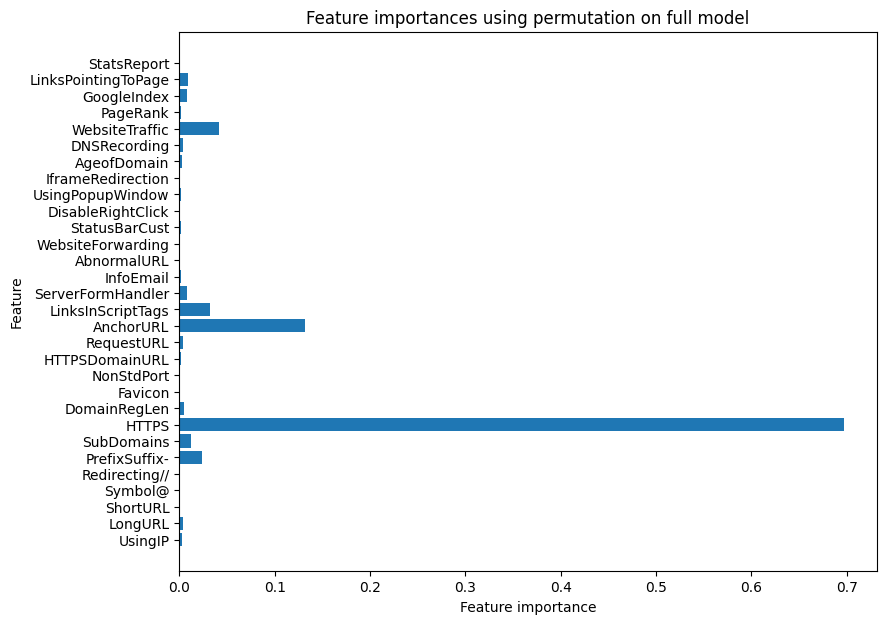

In [9]:
# Checking the feature improtance in the model

plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

# Conclusion
1. The final take away from this project is to explore various machine learning models, perform Exploratory Data Analysis on phishing dataset and understanding their features.
2. Creating this notebook helped me to learn a lot about the features affecting the models to detect whether URL is safe or not, also I came to know how to fine-tuned model and how they affect the model performance.
3. The final conclusion on the Phishing dataset is that the some feature like "HTTTPS", "AnchorURL", "WebsiteTraffic" have more importance to classify URL is phishing URL or not.
4. Gradient Boosting Classifier currectly classify URL upto 97.4% respective classes and hence reduces the chance of malicious attachments.